<a href="https://colab.research.google.com/github/curiousbasil/DockerHomework/blob/master/Google_Store_Case_Study_and_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Google Store Case Study and Analytics**

Project #1 for CS 6341J1 .
*Due on 10th of Nov 2019*

---
Case Study and Program Prepaired by:

*   **Faisal Sukkar**
*   **Steven Wong**






In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# To support python 2 & 3
from __future__ import division, print_function, unicode_literals
#Basic Imports
import os
import pandas as pd
import numpy as np
from google.colab import files
!pip install -q kaggle

#for stable output across runs
np.random.seed(42)

#to plot
!pip install matplotlib
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt


In [0]:
# Install Kaggle library
!pip install kaggle

In [0]:
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [0]:
# Move kaggle.json to /root/.kaggle/
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [0]:
!chmod 600 ~/.kaggle/kaggle.json

In [0]:
# Download dataset
!kaggle datasets download niteshmistry/minigacustomerrevenueprediction

 56% 9.00M/16.0M [00:00<00:00, 15.8MB/s]
100% 16.0M/16.0M [00:00<00:00, 25.2MB/s]


In [0]:
!ls -ltr

total 16388
drwxr-xr-x 1 root root     4096 Oct 25 16:58 sample_data
drwx------ 3 root root     4096 Nov  6 14:55 drive
-rw-r--r-- 1 root root       68 Nov  6 16:24 kaggle.json
-rw-r--r-- 1 root root 16767918 Nov  6 16:25 minigacustomerrevenueprediction.zip


In [0]:
# Install 7zip
!apt-get install p7zip-full

# Unzip
!7za e minigacustomerrevenueprediction.zip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
p7zip-full is already the newest version (16.02+dfsg-6).
0 upgraded, 0 newly installed, 0 to remove and 28 not upgraded.

7-Zip (a) [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.30GHz (306F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 16767918 bytes (16 MiB)

Extracting archive: minigacustomerrevenueprediction.zip
--
Path = minigacustomerrevenueprediction.zip
Type = zip
Physical Size = 16767918

  0%     13% 1 - mini-train.csv                        27% 1 - mini-train.csv                        35% 1 - mini-train.csv                        43% 1 - mini-train.csv  

In [0]:
# List files
!ls -ltr

total 366720
drwxr-xr-x 1 root root      4096 Oct 25 16:58 sample_data
-rw-r--r-- 1 root root  33552335 Nov  2 19:51 mini-test.csv
-rw-r--r-- 1 root root 325178219 Nov  2 19:52 mini-train.csv
drwx------ 3 root root      4096 Nov  6 14:55 drive
-rw-r--r-- 1 root root        68 Nov  6 16:24 kaggle.json
-rw-r--r-- 1 root root  16767918 Nov  6 16:25 minigacustomerrevenueprediction.zip


In [0]:
import pandas as pd
# Load train data
train = pd.read_csv('./mini-train.csv')

In [0]:
train.head()

,channelGrouping,customDimensions,date,fullVisitorId,hits,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,device.browserSize,device.browserVersion,device.deviceCategory,device.flashVersion,device.isMobile,device.language,device.mobileDeviceBranding,device.mobileDeviceInfo,device.mobileDeviceMarketingName,device.mobileDeviceModel,device.mobileInputSelector,device.operatingSystem,device.operatingSystemVersion,device.screenColors,device.screenResolution,geoNetwork.city,geoNetwork.cityId,geoNetwork.continent,geoNetwork.country,geoNetwork.latitude,geoNetwork.longitude,geoNetwork.metro,geoNetwork.networkDomain,geoNetwork.networkLocation,geoNetwork.region,geoNetwork.subContinent,totals.bounces,totals.hits,totals.newVisits,totals.pageviews,totals.sessionQualityDim,totals.timeOnSite,totals.totalTransactionRevenue,totals.transactionRevenue,totals.transactions,totals.visits,trafficSource.adContent,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.criteriaParameters,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source
0,Organic Search,"[{'index': '4', 'value': 'EMEA'}]",20171016,3162355547410993243,"[{'hitNumber': '1', 'time': '0', 'hour': '17',...",Not Socially Engaged,1508198450,1,1508198450,Firefox,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Europe,Germany,not available in demo dataset,not available in demo dataset,not available in demo dataset,(not set),not available in demo dataset,not available in demo dataset,Western Europe,1.0,1,1.0,1.0,1.0,NaN,NaN,NaN,NaN,1,NaN,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,(not set),NaN,water bottle,organic,NaN,google
1,Referral,"[{'index': '4', 'value': 'North America'}]",20171016,8934116514970143966,"[{'hitNumber': '1', 'time': '0', 'hour': '10',...",Not Socially Engaged,1508176307,6,1508176307,Chrome,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Chrome OS,not available in demo dataset,not available in demo dataset,not available in demo dataset,Cupertino,not available in demo dataset,Americas,United States,not available in demo dataset,not available in demo dataset,San Francisco-Oakland-San Jose CA,(not set),not available in demo dataset,California,Northern America,NaN,2,NaN,2.0,2.0,28.0,NaN,NaN,NaN,1,NaN,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,(not set),NaN,NaN,referral,/a/google.com/transportation/mtv-services/bike...,sites.google.com
2,Direct,"[{'index': '4', 'value': 'North America'}]",20171016,7992466427990357681,"[{'hitNumber': '1', 'time': '0', 'hour': '17',...",Not Socially Engaged,1508201613,1,1508201613,Chrome,not available in demo dataset,not available in demo dataset,mobile,not available in demo dataset,True,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Android,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Americas,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,windjammercab

In [0]:
#Load Test Dataset
test = pd.read_csv('./mini-test.csv')

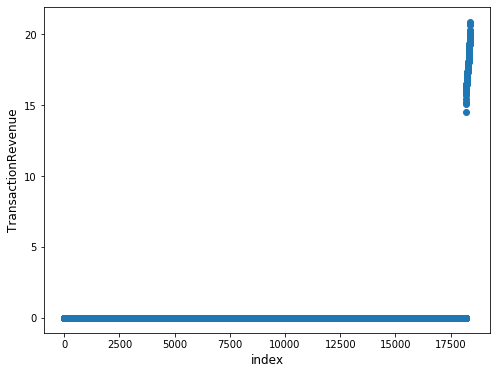

In [0]:
train["totals.transactionRevenue"] = train["totals.transactionRevenue"].astype('float')
gdf = train.groupby("fullVisitorId")["totals.transactionRevenue"].sum().reset_index()

plt.figure(figsize=(8,6))
plt.scatter(range(gdf.shape[0]), np.sort(np.log1p(gdf["totals.transactionRevenue"].values)))
plt.xlabel('index', fontsize=12)
plt.ylabel('TransactionRevenue', fontsize=12)
plt.show()

#Comment here on the plot above

---

comment


In [0]:
nzi = pd.notnull(train["totals.transactionRevenue"]).sum()
nzr = (gdf["totals.transactionRevenue"]>0).sum()
print("Number of instances in train set with non-zero revenue : ", nzi, " and ratio is : ", nzi / train.shape[0])
print("Number of unique customers with non-zero revenue : ", nzr, "and the ratio is : ", nzr / gdf.shape[0])

Number of instances in train set with non-zero revenue :  193  and ratio is :  0.00965
Number of unique customers with non-zero revenue :  189 and the ratio is :  0.010280678851174934


#comment here on this


---
comment



In [0]:
print("Number of unique visitors in train set : ",train.fullVisitorId.nunique(), " out of rows : ",train.shape[0])
print("Number of unique visitors in test set : ",test.fullVisitorId.nunique(), " out of rows : ",test.shape[0])
print("Number of common visitors in train and test set : ",len(set(train.fullVisitorId.unique()).intersection(set(test.fullVisitorId.unique())) ))

Number of unique visitors in train set :  18384  out of rows :  20000
Number of unique visitors in test set :  1855  out of rows :  2000
Number of common visitors in train and test set :  7


#Comment on this 


---

Comment

---



In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 59 columns):
channelGrouping                                      20000 non-null object
customDimensions                                     20000 non-null object
date                                                 20000 non-null int64
fullVisitorId                                        20000 non-null uint64
hits                                                 20000 non-null object
socialEngagementType                                 20000 non-null object
visitId                                              20000 non-null int64
visitNumber                                          20000 non-null int64
visitStartTime                                       20000 non-null int64
device.browser                                       20000 non-null object
device.browserSize                                   20000 non-null object
device.browserVersion                                20000 non-null ob

In [0]:
train.describe()

,date,fullVisitorId,visitId,visitNumber,visitStartTime,totals.bounces,totals.hits,totals.newVisits,totals.pageviews,totals.sessionQualityDim,totals.timeOnSite,totals.totalTransactionRevenue,totals.transactionRevenue,totals.transactions,totals.visits,trafficSource.adwordsClickInfo.page
count,2.000000e+04,2.000000e+04,2.000000e+04,20000.000000,2.000000e+04,9873.0,20000.000000,15088.0,19999.000000,9120.000000,10101.000000,1.930000e+02,1.930000e+02,196.000000,20000.0,630.000000
mean,2.017041e+07,4.533406e+18,1.498277e+09,2.264200,1.498277e+09,1.0,4.794450,1.0,3.971549,4.456140,264.244629,1.278192e+08,1.087636e+08,1.040816,1.0,1.023810
std,4.737638e+03,3.067707e+18,1.565797e+07,7.876636,1.565797e+07,0.0,9.080243,0.0,6.498605,12.593541,459.176173,2.432262e+08,1.711924e+08,0.222727,0.0,0.172159
min,2.016090e+07,8.864048e+13,1.472799e+09,1.000000,1.472800e+09,1.0,1.000000,1.0,1.000000,1.000000,1.000000,4.990000e+06,1.990000e+06,1.000000,1.0,1.000000
25%,2.017020e+07,1.618305e+18,1.486118e+09,1.000000,1.486118e+09,1.0,1.000000,1.0,1.000000,1.000000,35.000000,2.799000e+07,2.102000e+07,1.000000,1.0,1.000000
50%,2.017062e+07,4.446795e+18,1.498247e+09,1.000000,1.498247e+09,1.0,2.000000,1.0,2.000000,1.000000,94.000000,5.171000e+07,4.458000e+07,1.000000,1.0,1.000000
75%,2.017113e+07,7.218982e+18,1.512038e+09,1.000000,1.512038e+09,1.0,5.000000,1.0,4.000000,1.000000,270.000000,1.141600e+08,1.087200e+08,1.000000,1.0,1.000000
max,2.018042e+07,9.999250e+18,1.523862e+09,401.000000,1.523862e+09,1.0,229.000000,1.0,165.000000,96.000000,5553.000000,2.103690e+09,1.171470e+09,3.000000,1.0,3.000000




---


#**Columns with Consistent or Null Values**


---



In [0]:
const_cols = [c for c in train.columns if train[c].nunique(dropna=False)==1 ]
const_cols

['socialEngagementType',
 'device.browserSize',
 'device.browserVersion',
 'device.flashVersion',
 'device.language',
 'device.mobileDeviceBranding',
 'device.mobileDeviceInfo',
 'device.mobileDeviceMarketingName',
 'device.mobileDeviceModel',
 'device.mobileInputSelector',
 'device.operatingSystemVersion',
 'device.screenColors',
 'device.screenResolution',
 'geoNetwork.cityId',
 'geoNetwork.latitude',
 'geoNetwork.longitude',
 'geoNetwork.networkLocation',
 'totals.visits',
 'trafficSource.adwordsClickInfo.criteriaParameters']

## As we see above, that 19 columns have either Null Values or Constant Values.
This does not much or any information regarding the data set and will not affect the prediction model.



---




In [0]:
import pandas as pd
train_df = pd.read_csv('./mini-test.csv', names=['fullVisitorId', 'geoNetwork.continent', 'totals.totalTransactionRevenue'])
print(train_df.head(10))



---
#Scatter Plot of Visitor IDs agains Total Trx Revenue


---




Text(0, 0.5, 'totals.totalTransactionRevenue')

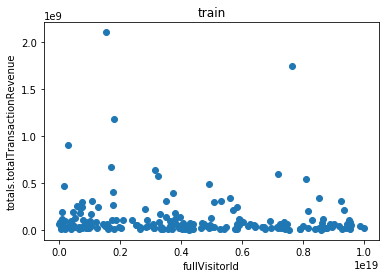

In [86]:
import pandas as pd
fig, ax = plt.subplots()
# scatter the fullVisitorId against the totals.totalTransactionRevenue
ax.scatter(train['fullVisitorId'], train['totals.totalTransactionRevenue'])
# set a titles of the axes and labels
ax.set_title('train')
ax.set_xlabel('fullVisitorId')
ax.set_ylabel('totals.totalTransactionRevenue')

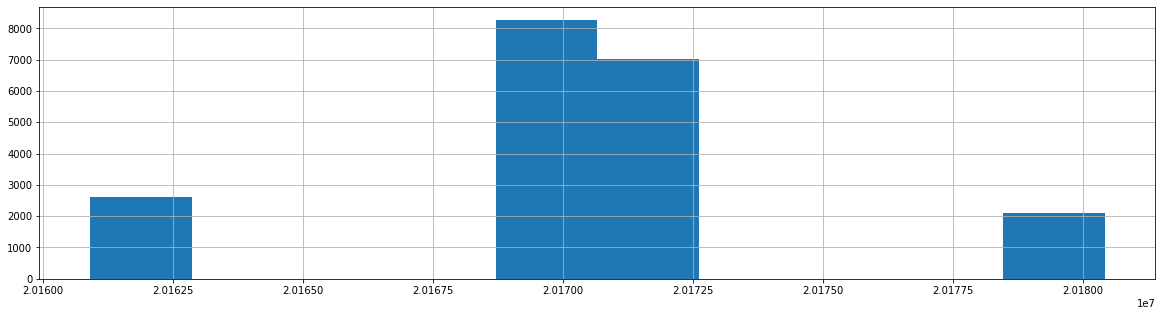

In [113]:
train["date"].hist(figsize=(20, 5))



---


#Continent Breakdown


---


From the Chart Above we can see that Most of the visitors come from The American Continent. Followed by Europe and Asia.

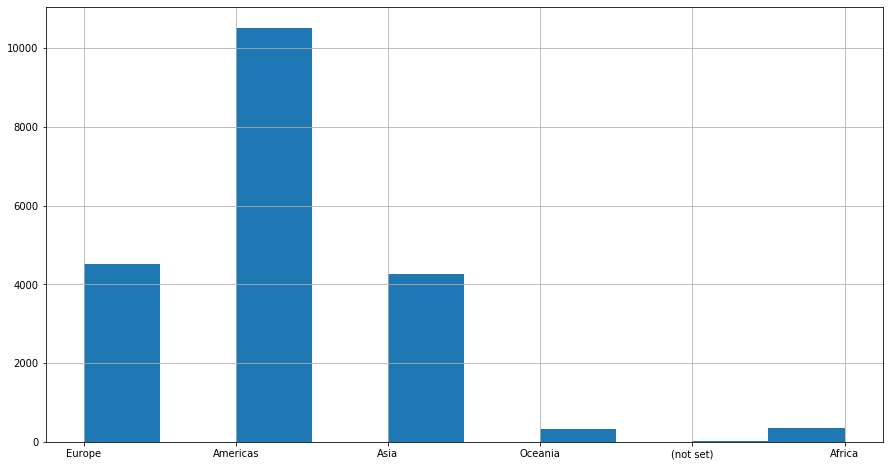

In [117]:
train["geoNetwork.continent"].hist(figsize=(15, 8))

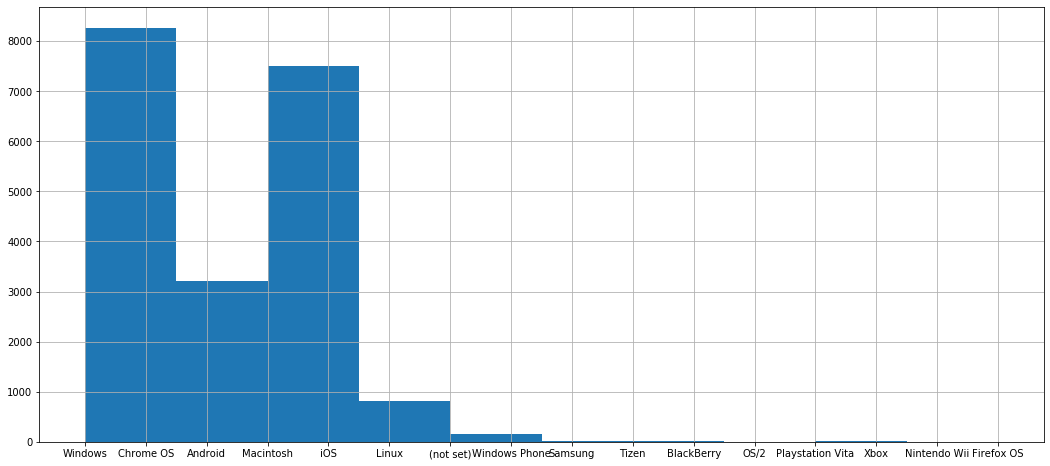

In [109]:
train["device.operatingSystem"].hist(figsize=(18, 8))

In [0]:
# get columns to plot
columns = train.columns.drop(['totals.totalTransactionRevenue'])
# create x data
x_data = range(0, train.shape[0])
# create figure and axis
fig, ax = plt.subplots()
# plot each column
for column in columns:
    ax.plot(x_data, train[column], label=column)
# set title and legend
ax.set_title('train Dataset')
ax.legend()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4ef3eec588>]],
      dtype=object)

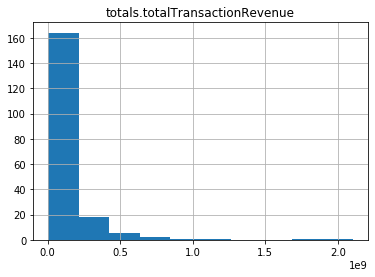

In [0]:
train.hist("totals.totalTransactionRevenue")



---


#Building Model


---



In [0]:
print("Variables not in test but in train : ", set(train.columns).difference(set(test.columns)))

Variables not in test but in train :  set()


In [0]:
cols_to_drop = const_cols + ['sessionId']

train = train.drop(cols_to_drop + ["trafficSource.campaignCode"], axis=1)
test = test.drop(cols_to_drop, axis=1)

NameError: ignored